In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('/content/data.csv')

In [3]:
data

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [4]:
data['Body'][1]

'LONDON (Reuters) - “Last Flag Flying”, a comedy-drama about Vietnam war veterans, will resonate with Trump’s America, despite, or perhaps because of, its period setting, actor Bryan Cranston said on Sunday after a screening at the London Film Festival.\nSet in the United States in December 2003 – when U.S. forces in Iraq were dragging Saddam Hussein out of a “spider hole” - it is the story of three ageing former servicemen who reunite to bury the son of one of them who has been killed in action.\nWith President Donald Trump saying he could “totally destroy” North Korea and characterizing a dinner with military commanders as “the calm before the storm”, Cranston said “Last Flag Flying” was a timely reminder of the effect on normal Americans of ill-advised military campaigns.\n“I think it has a lot of relevance today in the sense that (today) it’s not clear cut as far as the (what are the) intentions of the government or military,” Cranston, acclaimed for his lead role in the TV drama “

In [5]:
data['Headline'][1]

"Linklater's war veteran comedy speaks to modern America, says star"

In [6]:
data.isna().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [7]:
data['Body'].fillna(method='ffill',inplace=True)

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
wnl=WordNetLemmatizer()
corpus=[]

In [10]:
for i in range(len(data)):
  review=re.sub('[^a-zA-Z]',' ',data['Body'][i])
  review=review.lower()
  review=review.split()
  review=[wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [11]:
data=data.drop(['URLs'],axis=1)

In [12]:
data['clean_text']=corpus

In [13]:
data

,Headline,Body,Label,clean_text
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,image copyright getty image sunday morning don...
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,london reuters last flag flying comedy drama v...
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,feud broke public view last week mr corker sai...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,mexico city reuters egypt cheiron holding limi...
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,country singer jason aldean performing la vega...
...,...,...,...,...
4004,Trends to Watch,Trends to Watch\n% of readers think this story...,0,trend watch reader think story fact add two ce...
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,trump jr soon give minute speech reader think ...
4006,"Ron Paul on Trump, Anarchism & the AltRight",Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,trump jr soon give minute speech reader think ...
4007,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1,shanghai reuters china said plan accept data o...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(analyzer = "word", 
                             preprocessor = None, 
                             stop_words =  'english', 
                             max_features = 20000,lowercase=True)
data_features = vectorizer.fit_transform(data['clean_text'])
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(data_features)
data_mat = data_features_tfidf.toarray()

In [15]:
data['clean_text'][4008]

'vice president mike penny leaf nfl game anti american protest reader think story fact add two cent news donn marten vice president mike penny attended today national football league game indianapolis colt san francisco er chose leave several player chose use presence make anti american political statement cdn http www conservativedailynews com colt honored longtime player future hall fame quarterback peyton manning ceremony home team respected flag standing action opposing san francisco er seen sufficiently disrespectful veep departed venue kickoff reported indianapolis fox affiliate fox vp mike penny leaf colt game er player knelt anthem vice president mike penny decided leave indianapolis colt game sunday er player knelt national anthem tweet former indiana governor said left today colt game potus dignify event disrespect soldier flag national anthem minute tweet office released full statement left today colt game president trump dignify event disrespect soldier flag national anthem

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

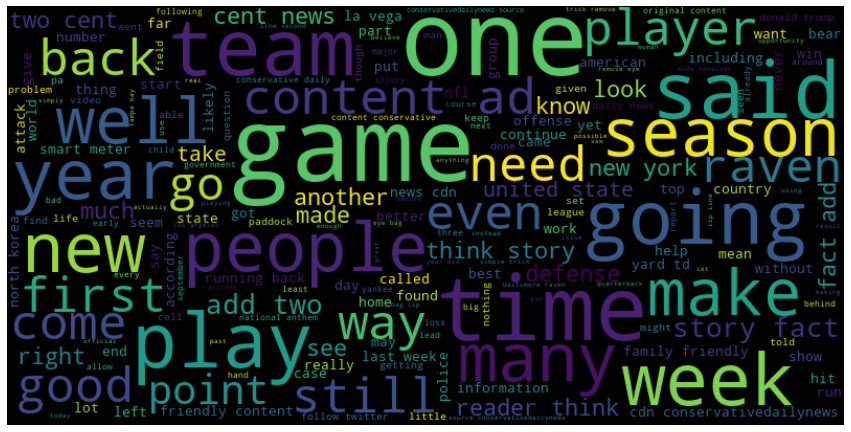

In [17]:
all_data=' '.join([sentence for sentence in data['clean_text'][data['Label']==0]])
wordcloud=WordCloud(width=800,height=400,max_font_size=100,random_state=42).generate(all_data)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

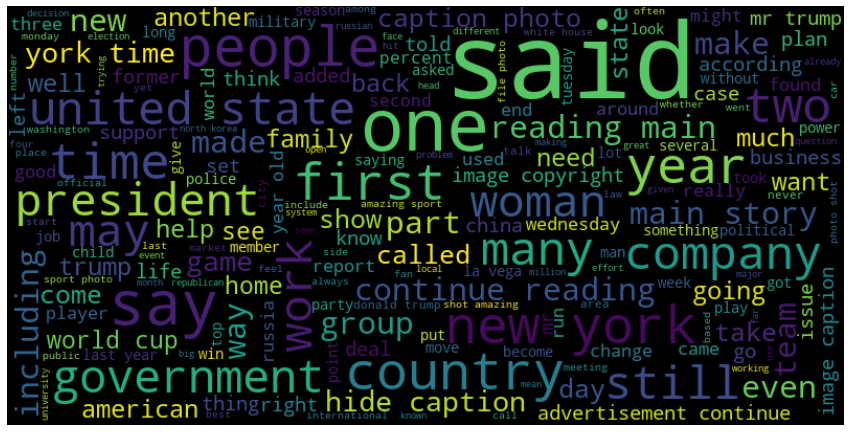

In [18]:
all_data=' '.join([sentence for sentence in data['clean_text'][data['Label']==1]])
wordcloud=WordCloud(width=800,height=400,max_font_size=100,random_state=42).generate(all_data)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
y=data['Label']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_mat,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rf.score(X_test,y_test)

0.9650872817955112

In [24]:
print(rf.predict(vectorizer.transform(['shanghai reuters china said plan accept data overseas clinical trial speed approval drug potential boon international drugmakers well patient often face lengthy delay new medicine reach market move outlined cabinet late sunday seek address high medicine cost access healthcare china population nearly billion past five year china approved innovative new drug one third number developed market accepting overseas clinical data help global drugmakers time growing competition chinese rival world second biggest pharmaceutical market well pressure authority anxious rein price overall china support scientific innovation drug medical device lacking quality product market still fall short top international level draft proposal said must speed examination approval urgently needed drug medical device cabinet also said would look improve protection medical intellectual property boost number quality clinical trial testing center china proposal contained timeline implementation want make drug industry large scale strong make competitive shift long term reliance import new drug wu zhen deputy head china food drug administration told briefing monday drug used overseas year making market china wu added china march proposed way speed approval imported drug including reforming clinical trial requirement also want boost drug industry see shift generic drug towards innovative medicine medical equipment reporting adam jourdan editing richard borsuk edwina gibbs'])))

[1]


In [25]:
print(rf.predict(vectorizer.transform(['vice president mike penny leaf nfl game anti american protest reader think story fact add two cent news donn marten vice president mike penny attended today national football league game indianapolis colt san francisco er chose leave several player chose use presence make anti american political statement cdn http www conservativedailynews com colt honored longtime player future hall fame quarterback peyton manning ceremony home team respected flag standing action opposing san francisco er seen sufficiently disrespectful veep departed venue kickoff reported indianapolis fox affiliate fox vp mike penny leaf colt game er player knelt anthem vice president mike penny decided leave indianapolis colt game sunday er player knelt national anthem tweet former indiana governor said left today colt game potus dignify event disrespect soldier flag national anthem minute tweet office released full statement left today colt game president trump dignify event disrespect soldier flag national anthem time many american inspiring nation courage resolve resilience ever rally around flag everything unites u everyone entitled opinion think much ask nfl player respect flag national anthem stand president trump stand soldier always stand flag national anthem announced friday penny would attend game second lady game special peyton manning jersey retired halftime inducted ring honor game tweeted looking forward honor great career peyton manning penny action doubt seized polluted nfl racial grievance hatred president trump proof stand white supremacy nazism dead right leave many fan attendance done well instead subjected politics radical leftist racial grievance monger driven league popularity historic low vice president expressed following via twitter vice president penny vp replying vp everyone entitled opinion think much ask nfl player respect flag national anthem vice president penny vp left today colt game potus dignify event disrespect soldier flag national anthem oct penny formerly governor indiana nfl needed even negative publicity early game even kicked read vice president mike penny leaf nfl game anti american protest original content conservative daily news conservative daily news american go news current event commentary trust cdn http www conservativedailynews com source http www conservativedailynews com vice president mike penny leaf nfl game anti american protest'])))

[0]


ITS predicting right yo nice